In [1]:
import os
import sys

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import trackintel as ti
from trackintel.geogr.distances import meters_to_decimal_degrees
from trackintel.io.dataset_reader import read_geolife


In [2]:
import sys
sys.executable

'/opt/anaconda3/envs/trackintel/bin/python3.8'

In [3]:
rawdata_geolife = read_geolife('rawdata_geolife')

start importing geolife user_id:  0
finished user_id:  0
start importing geolife user_id:  1
finished user_id:  1


/opt/anaconda3/envs/trackintel/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


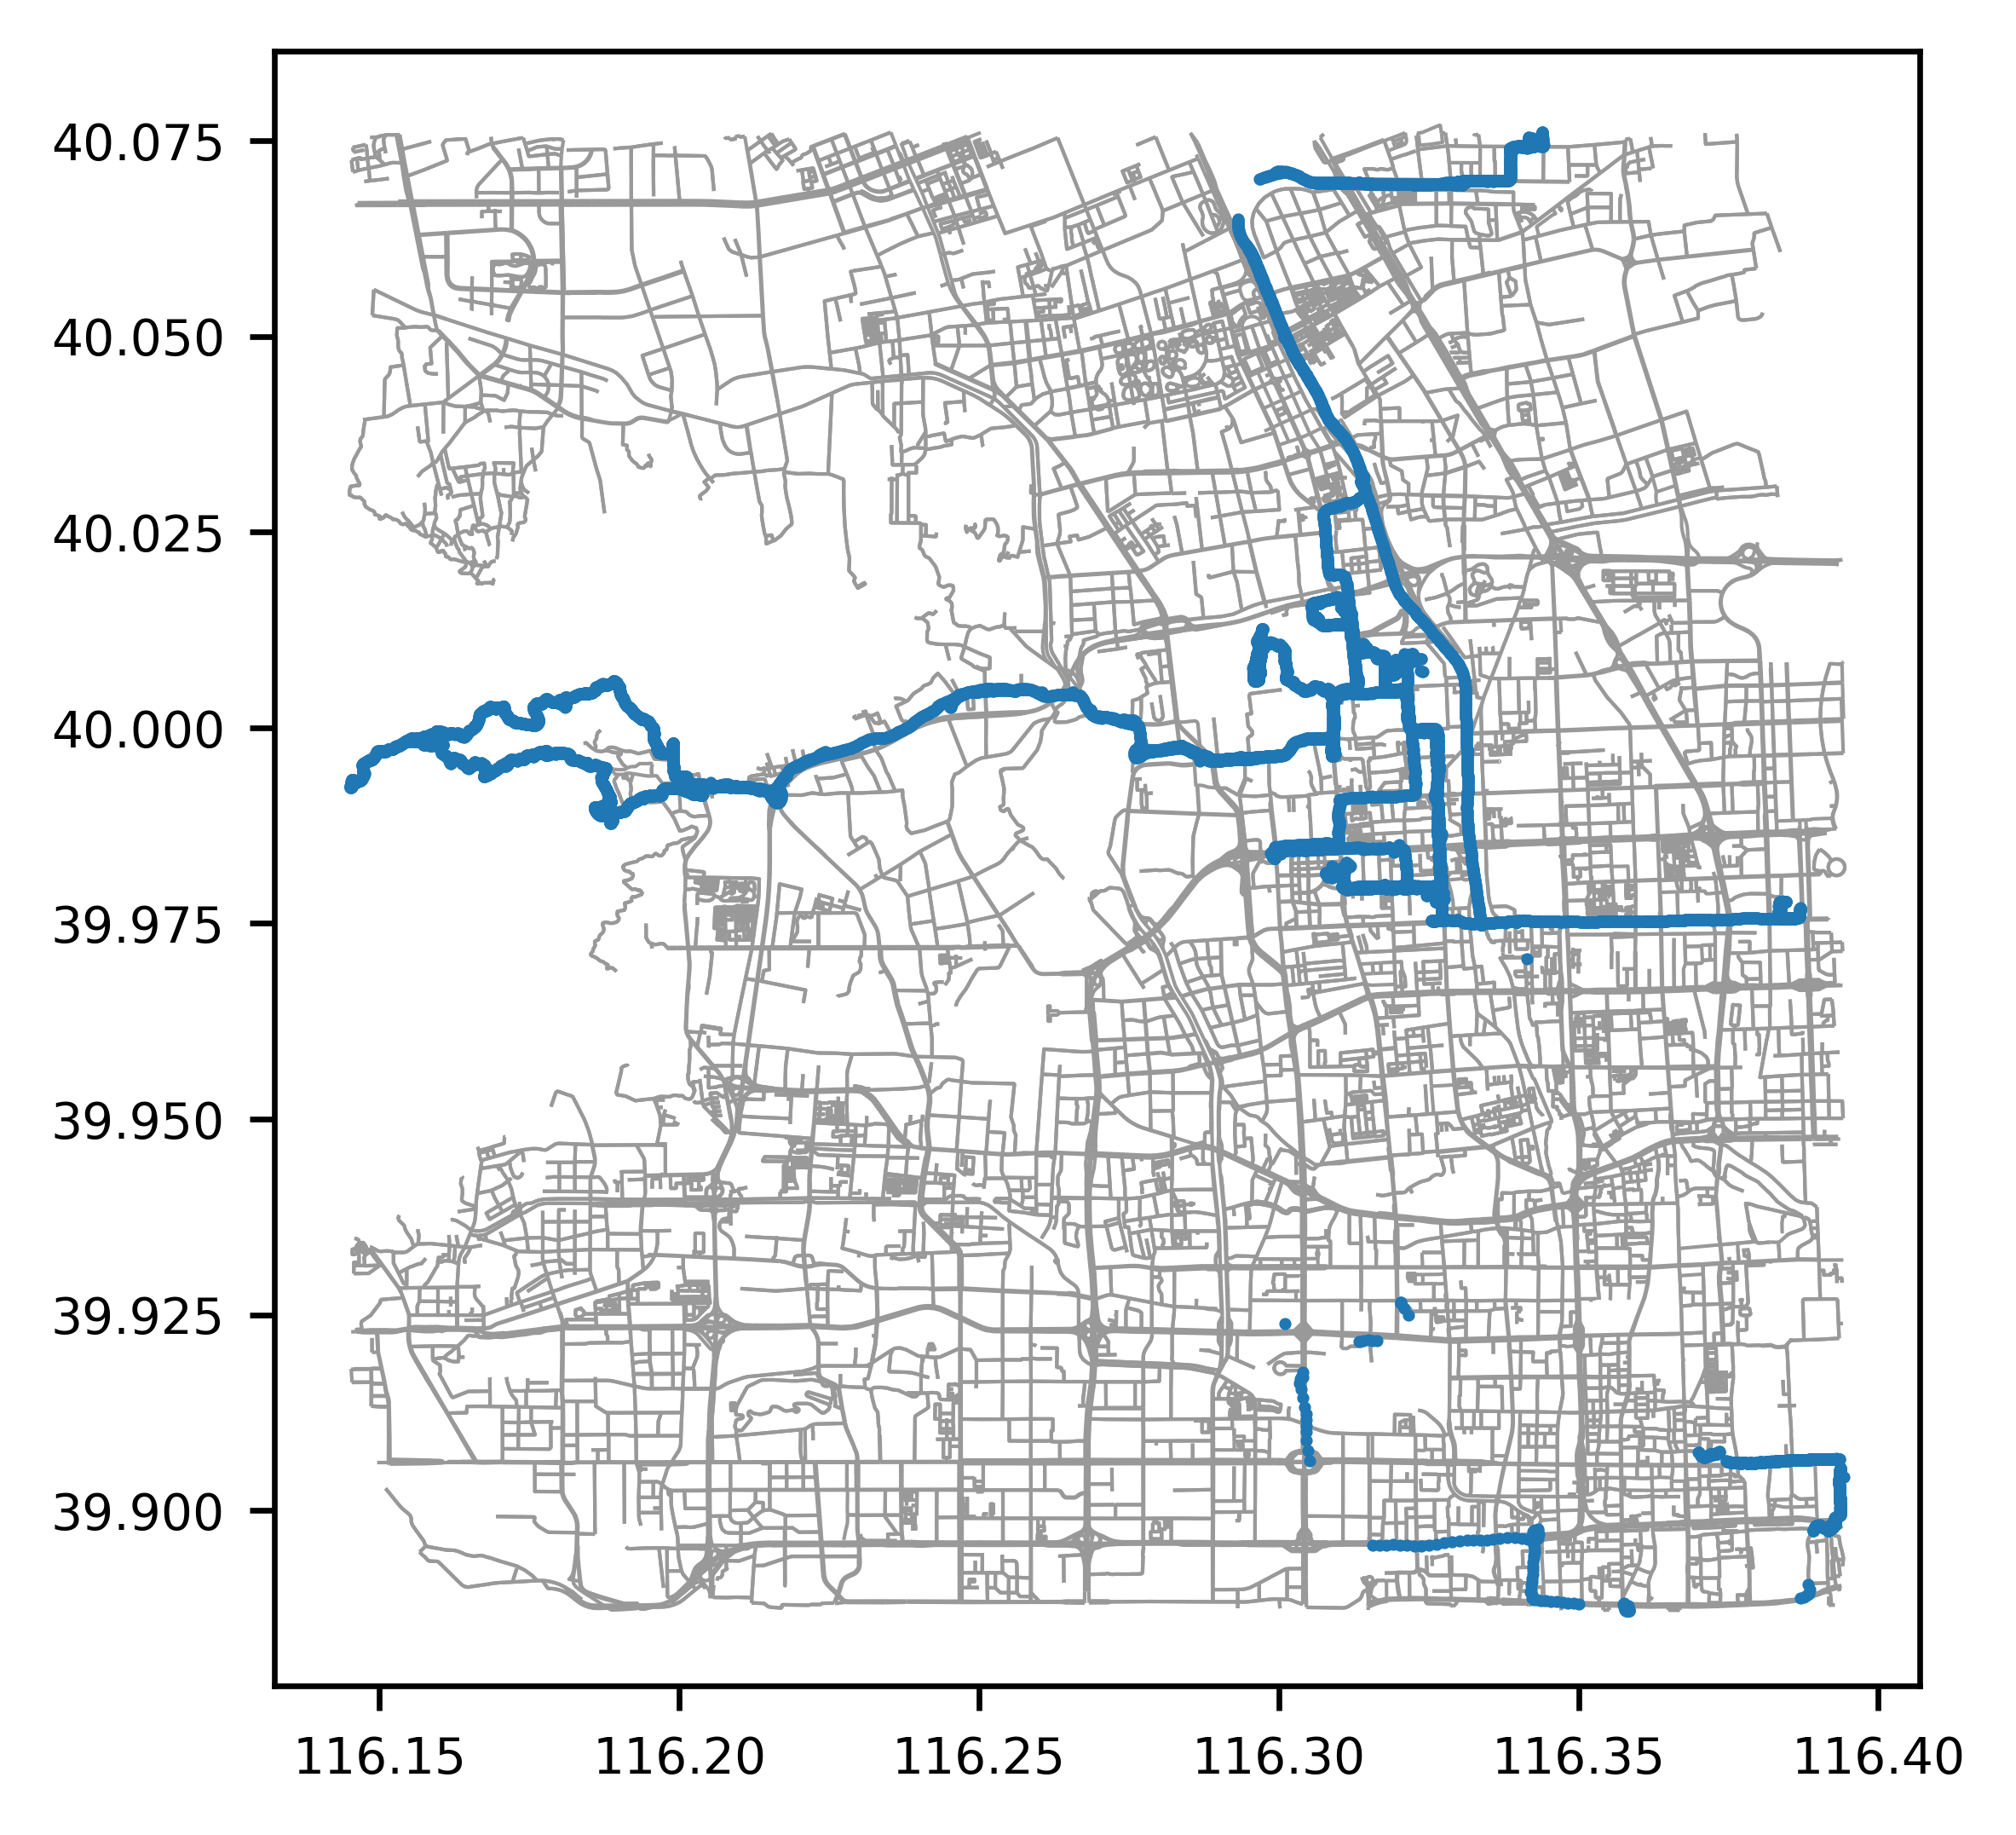

In [4]:
pfs = rawdata_geolife.copy()
pfs.as_positionfixes.plot(plot_osm=True)

(58, 6)


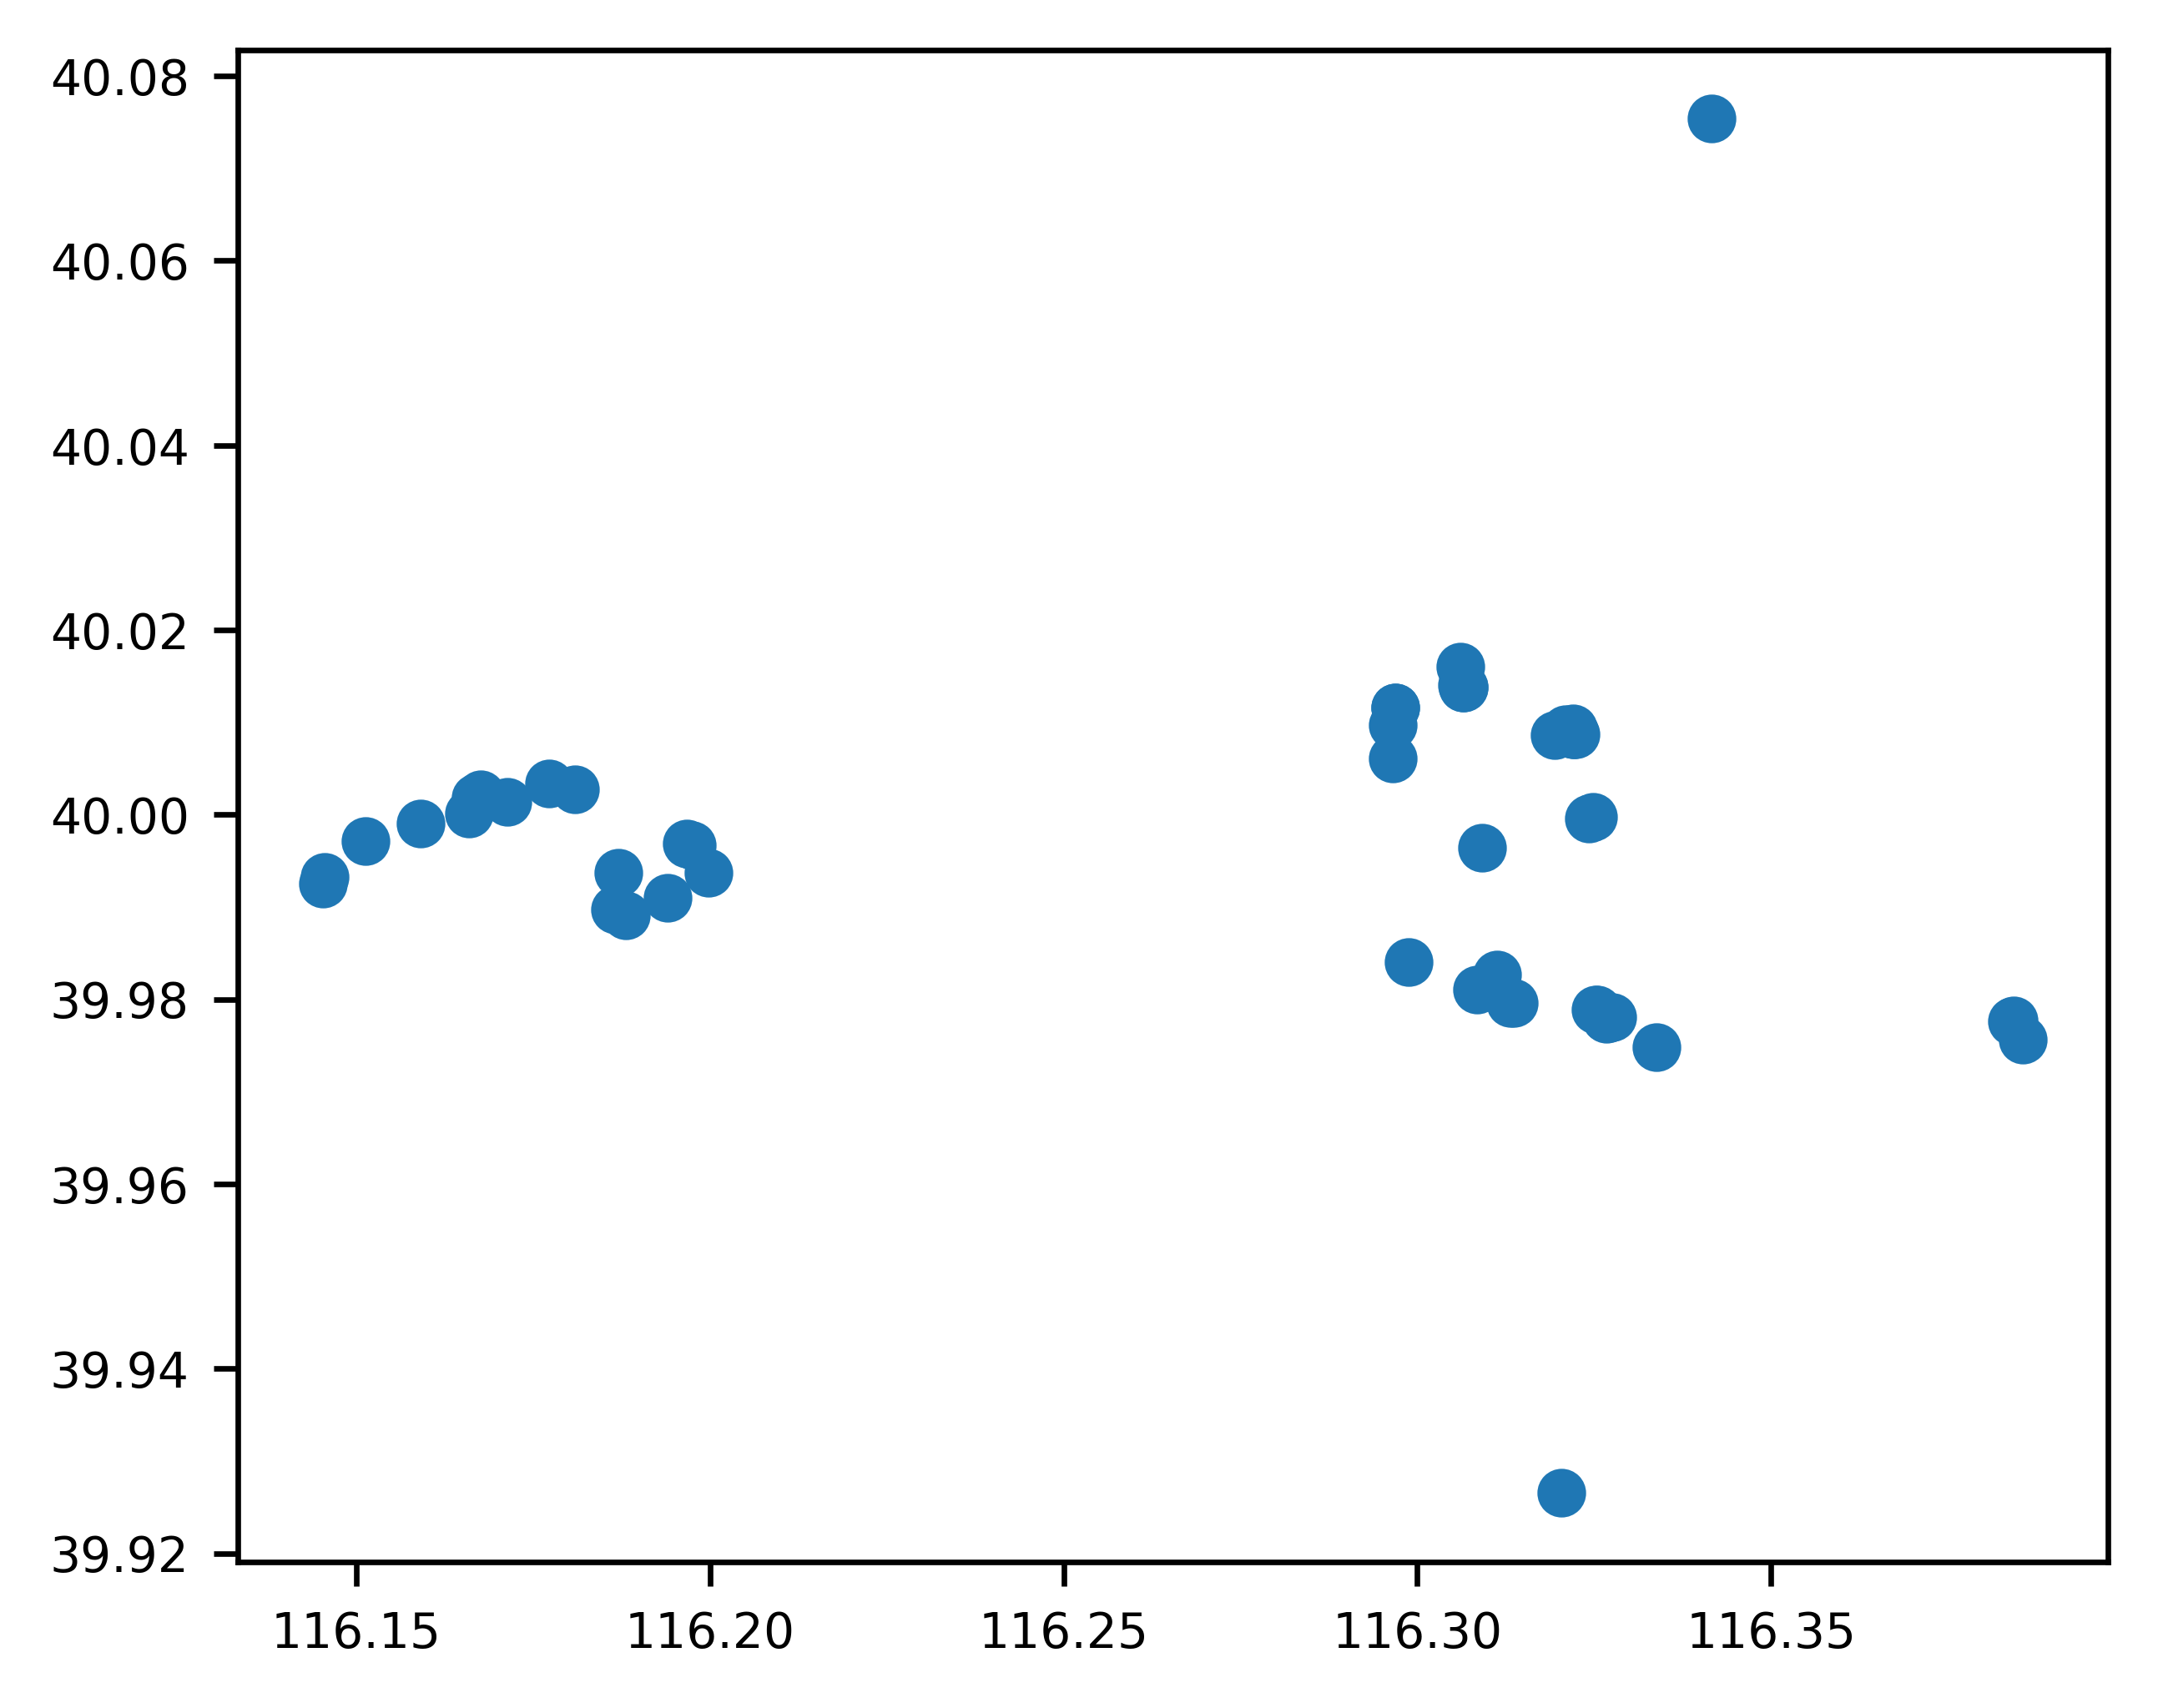

In [6]:
spts = pfs.as_positionfixes.extract_staypoints(method='sliding', dist_threshold=25, time_threshold=5*60)
print(spts.shape)
spts.plot()
spts.as_staypoints

In [7]:
pfs.as_positionfixes


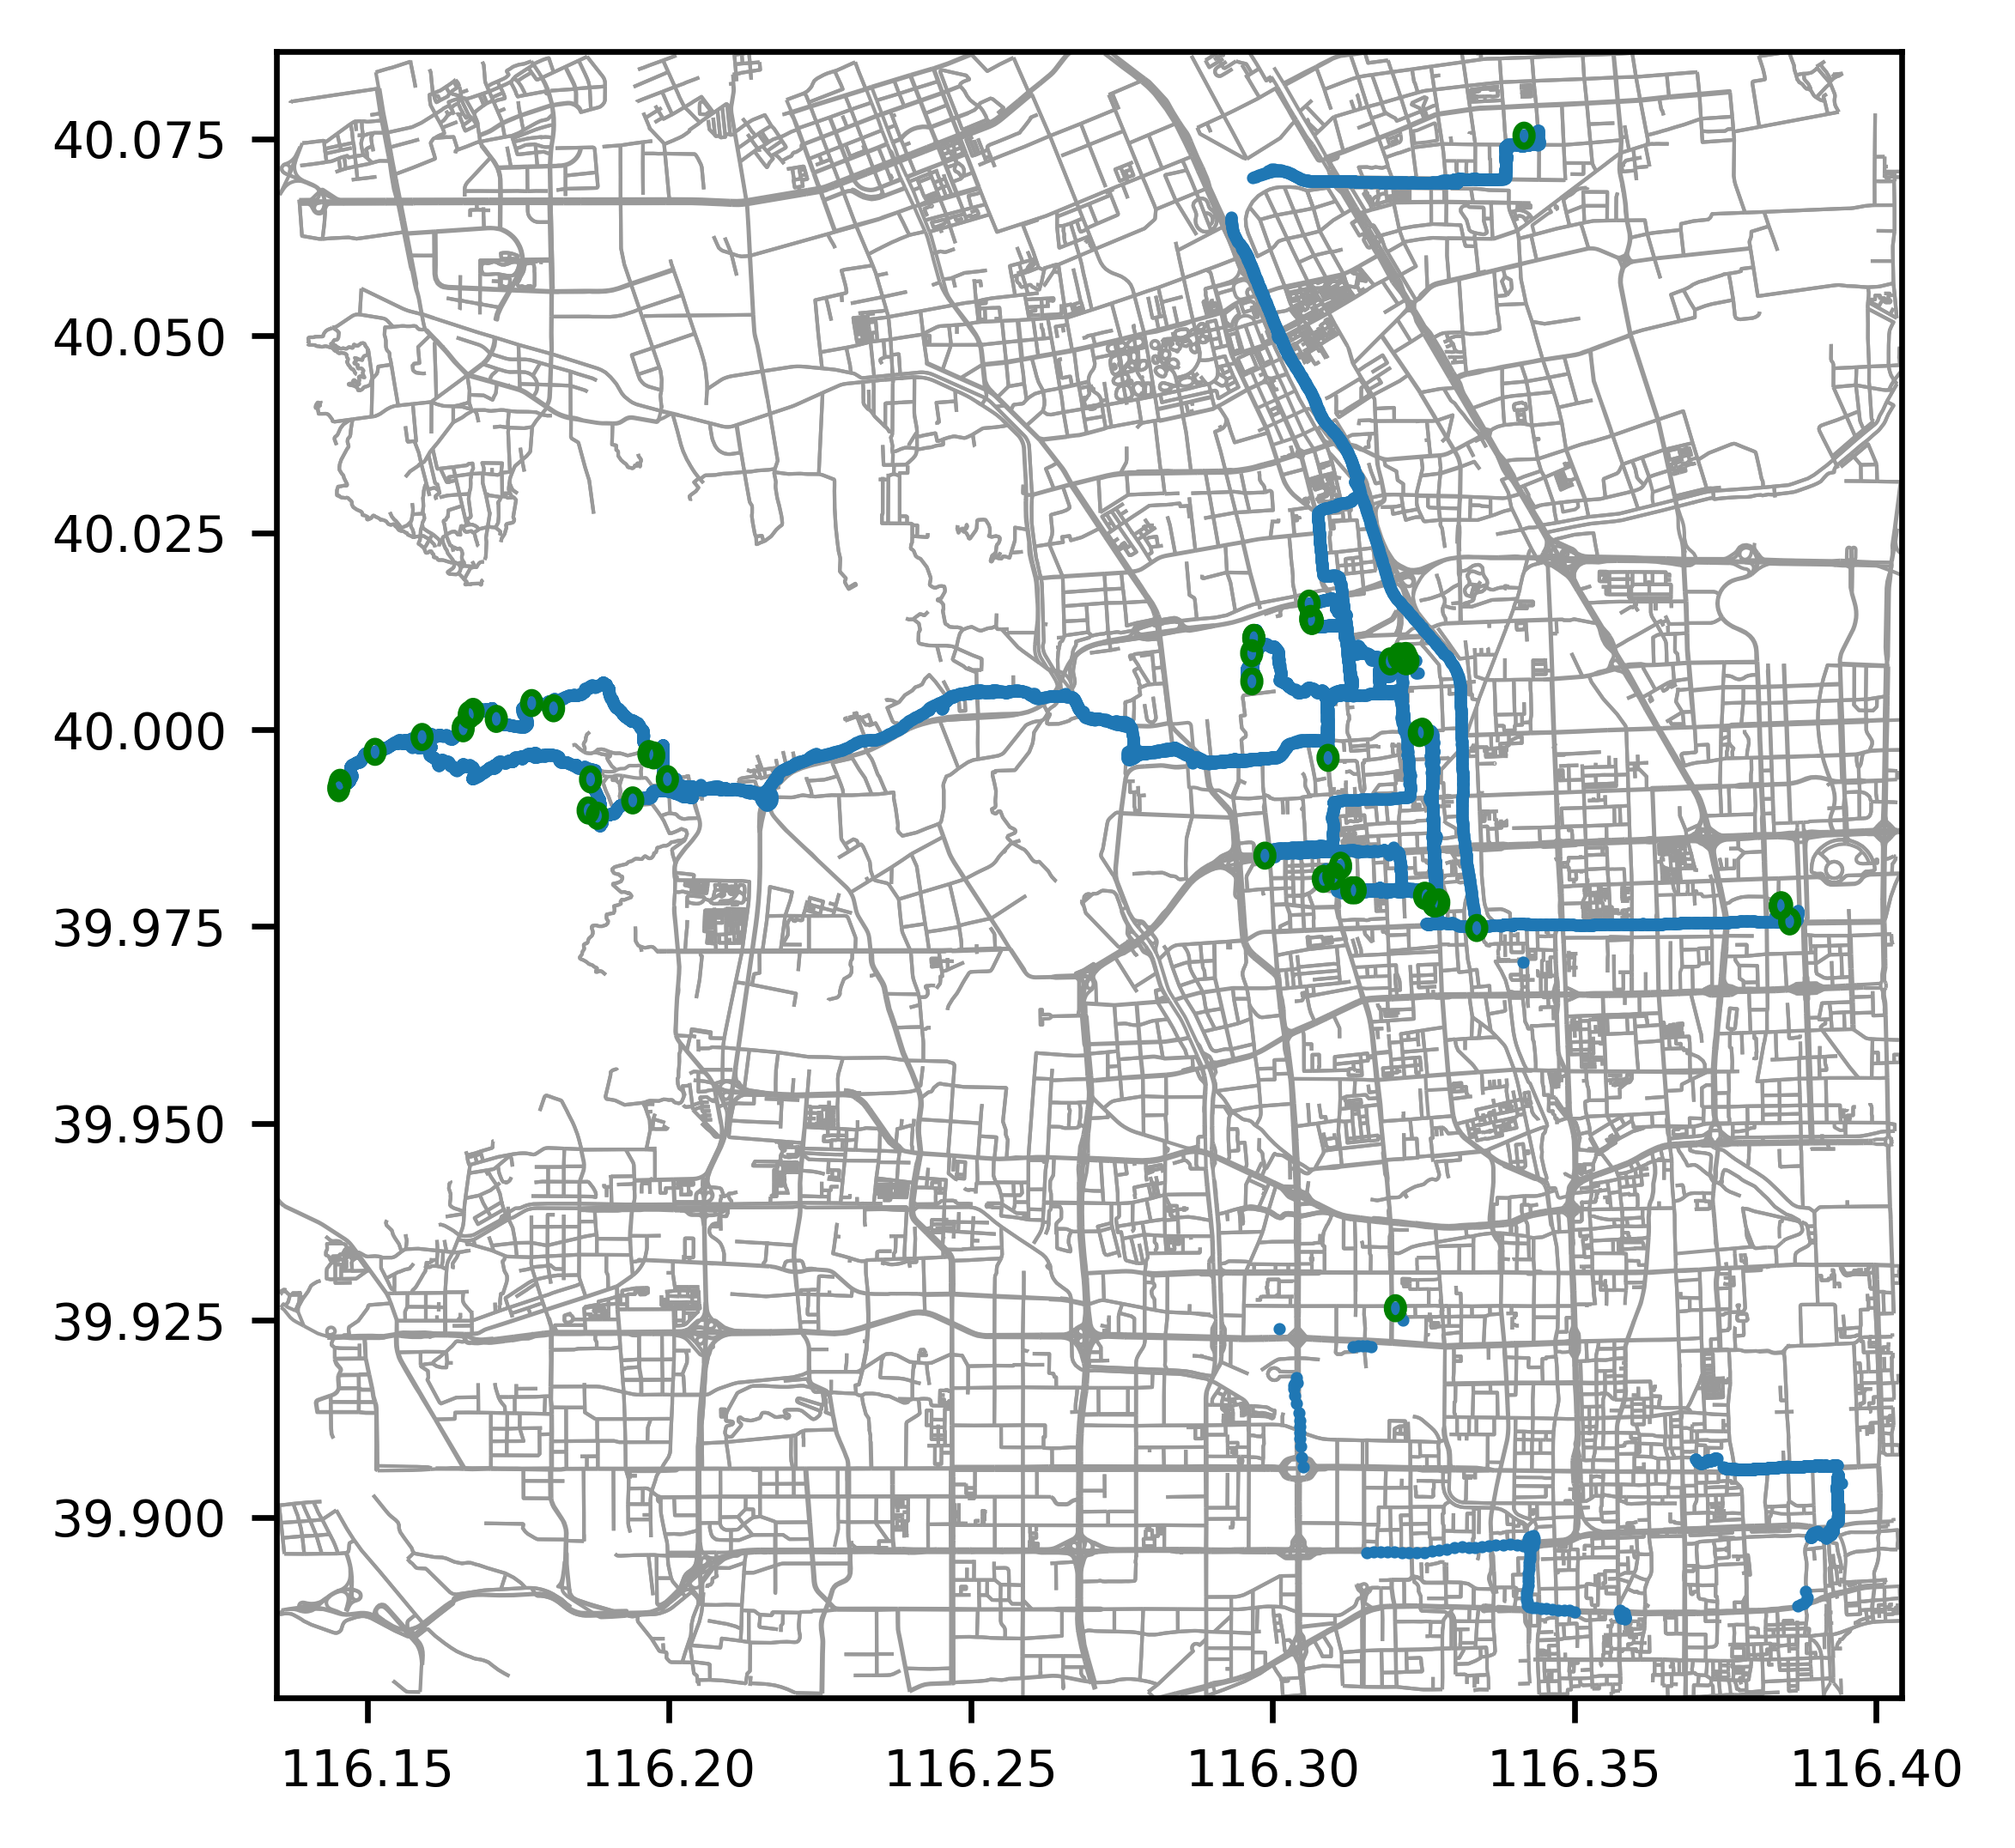

In [8]:
spts.as_staypoints.plot(radius=meters_to_decimal_degrees(100, 47.5), positionfixes=pfs, plot_osm=True)


In [10]:
plcs = spts.as_staypoints.extract_locations()
plcs.as_locations.plot(radius=meters_to_decimal_degrees(250, 47.5), 
                    positionfixes=pfs, staypoints=spts, staypoints_radius=meters_to_decimal_degrees(100, 47.5), 
                    plot_osm=True)

AttributeError: 'tuple' object has no attribute 'as_locations'

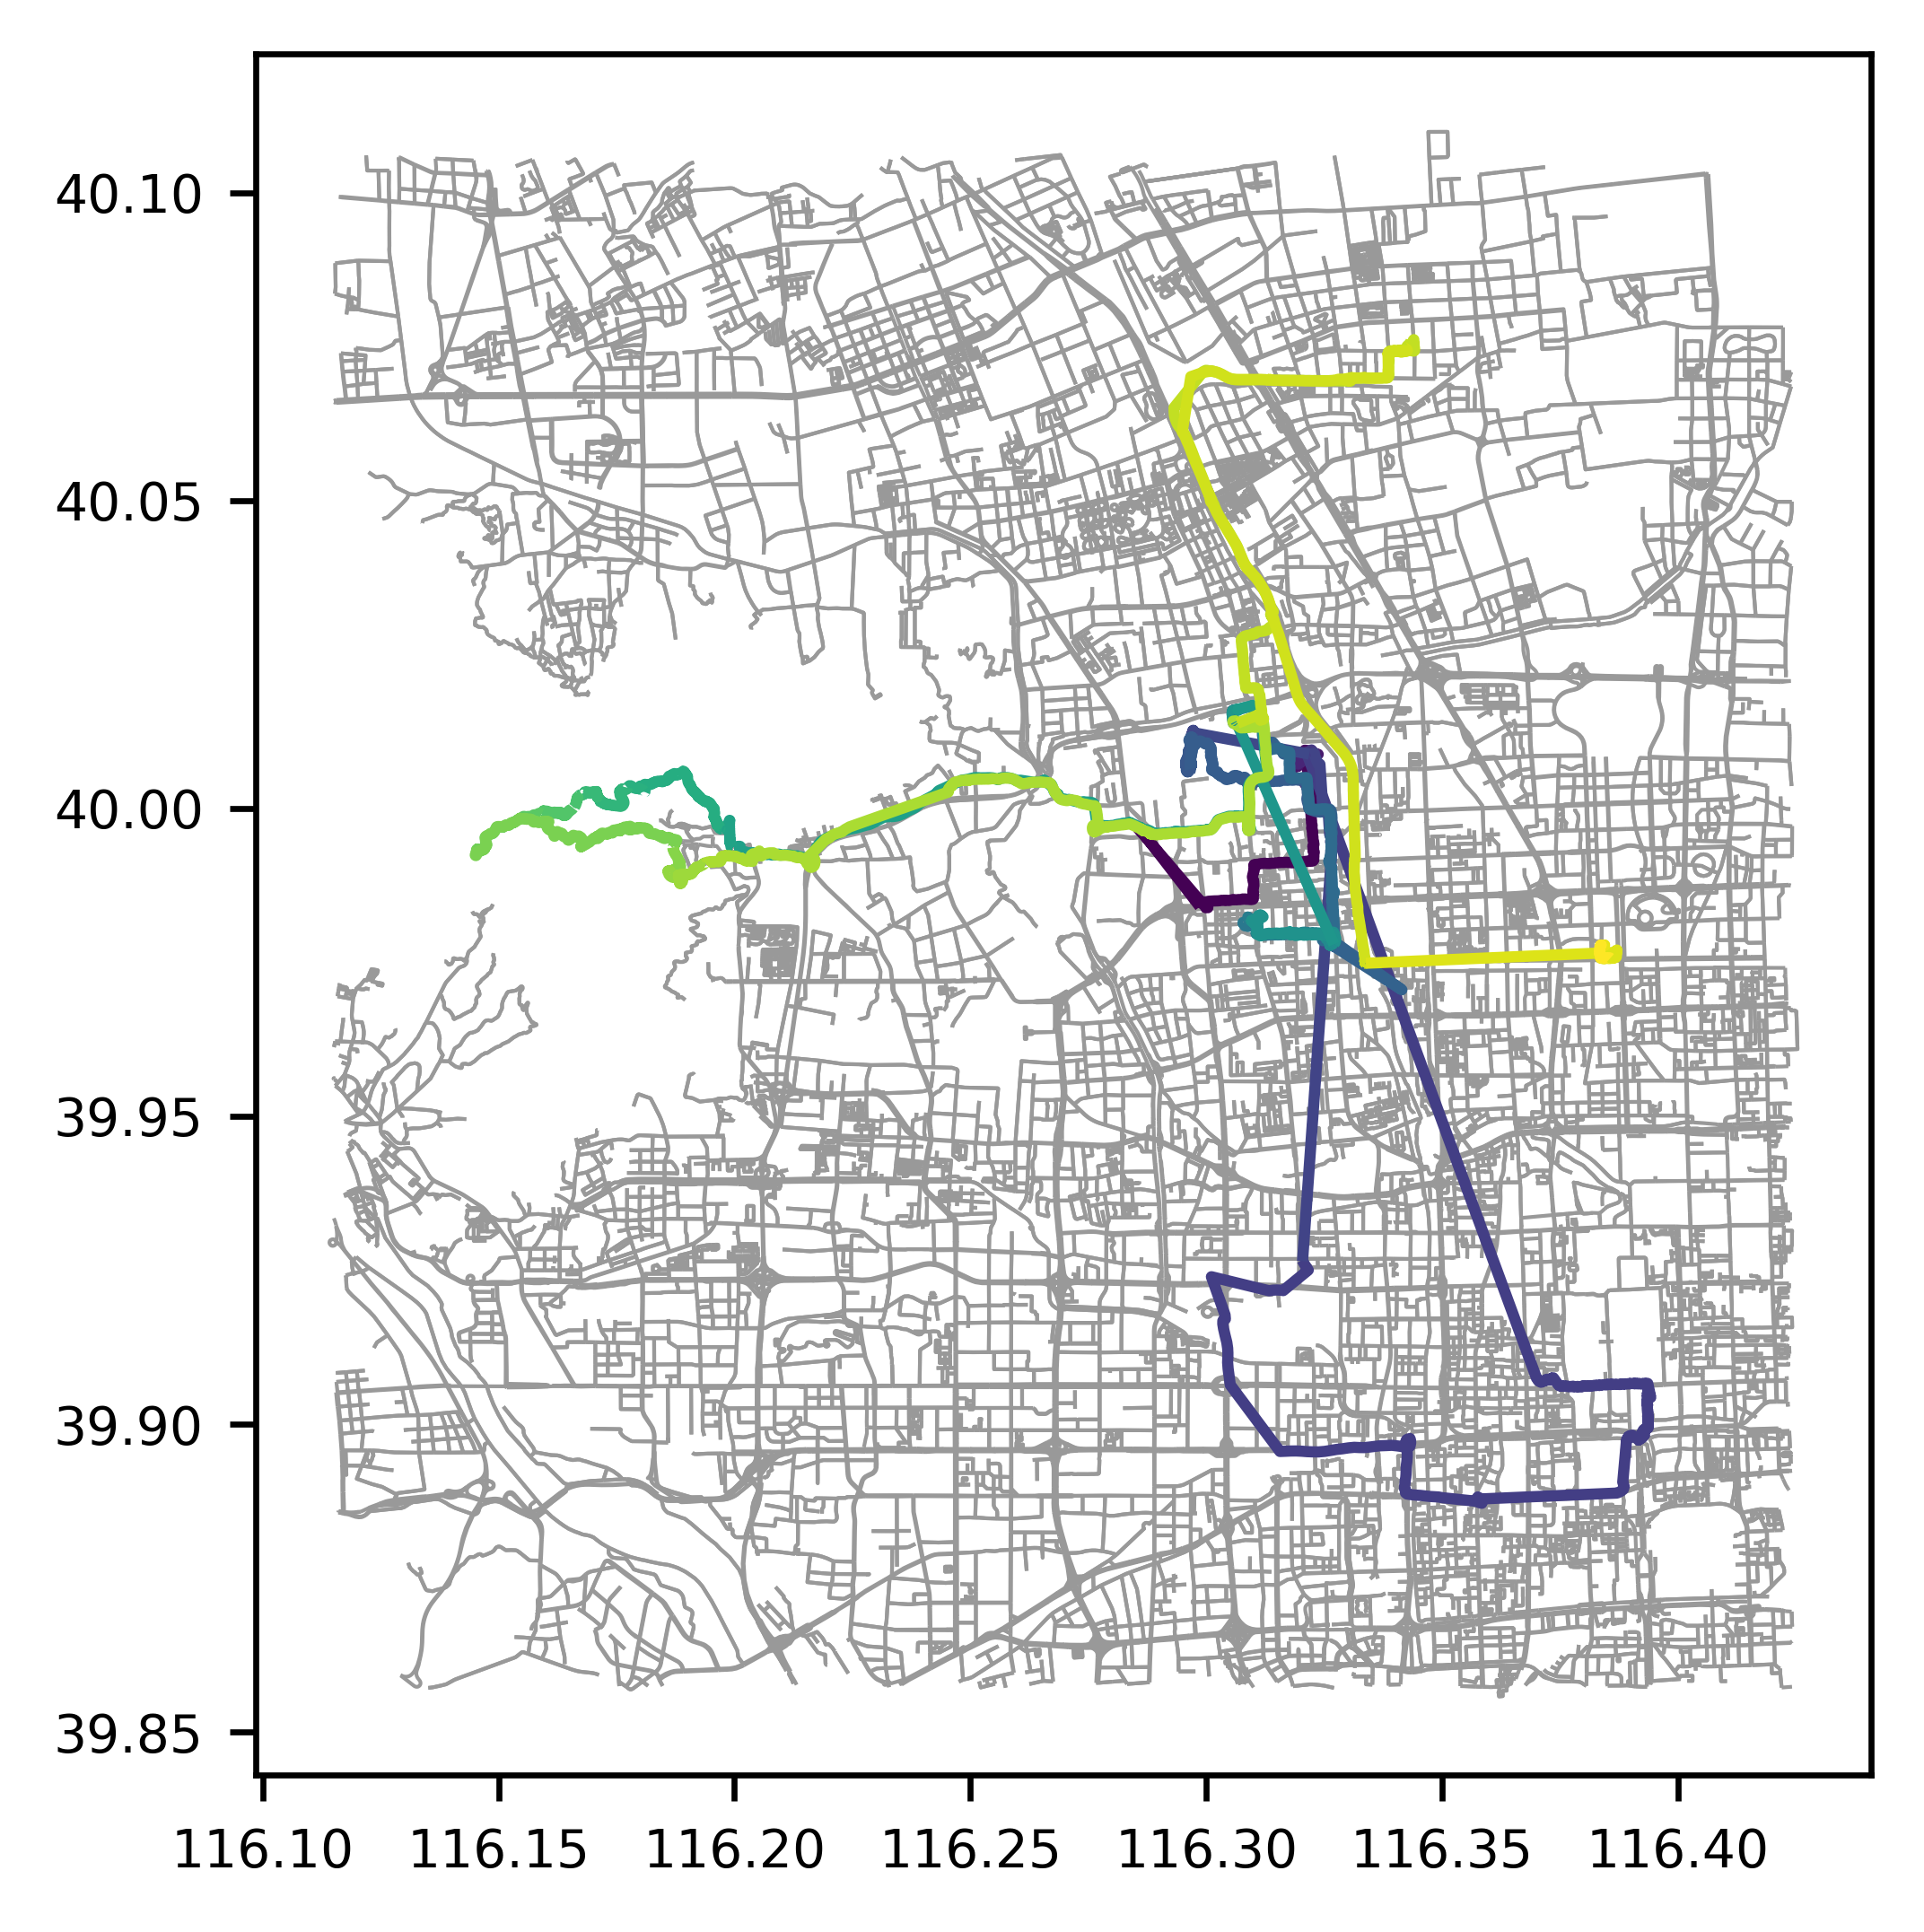

In [9]:
tpls = pfs.as_positionfixes.extract_triplegs(spts)
tpls.as_triplegs.plot(plot_osm=True)

In [10]:
print(os.getcwd())

C:\Users\henry\OneDrive\Programming\trackintel\examples\example_geolife


In [11]:
pfs['tracked_at'] = pfs['tracked_at'].astype(np.int64) // 10**9
spts['started_at'] = spts['started_at'].astype(np.int64) // 10**9
spts['finished_at'] = spts['finished_at'].astype(np.int64) // 10**9
tpls['started_at'] = tpls['started_at'].astype(np.int64) // 10**9
tpls['finished_at'] = tpls['finished_at'].astype(np.int64) // 10**9

if not os.path.exists(os.path.join('..', 'out', 'shp')):
    os.mkdir(os.path.join('..', 'out', 'shp'))

    
pfs.to_file(os.path.join('..', 'out', 'shp', 'geolife_positionfixes.shp'))
spts.to_file(os.path.join('..', 'out', 'shp', 'geolife_staypoints.shp'))
tpls.to_file(os.path.join('..', 'out', 'shp', 'geolife_triplegs.shp'))


In [12]:
import datetime
spts['activity'] = spts['finished_at'] - spts['started_at'] > datetime.timedelta(minutes=5)

TypeError: '>' not supported between instances of 'int' and 'datetime.timedelta'

In [ ]:
tpls.to_csv(os.path.join('..', 'out', 'geolife_triplegs.csv'),index=False)
spts.to_csv(os.path.join('..', 'out', 'geolife_staypoints.csv'),index=False)